In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [62]:
rating_data = pd.read_csv('./data/rating.csv')
user_data = pd.read_csv('./data/user.csv')
user_data.rename(columns={'id':'userId'}, inplace=True)
merge_data = rating_data.merge(user_data, on='userId')

In [63]:
merge_data
len(merge_data['userId'].unique())

661

In [64]:
len(user_data['userId'].unique())

869

In [65]:
rating_data

,id,userId,productId,reviewType,rating
0,1,3,p3,r1,Very Helpful
1,2,3,p3,r2,Very Helpful
2,3,3,p3,r3,Very Helpful
3,4,3,p3,r4,Very Helpful
4,5,3,p3,r5,Very Helpful
...,...,...,...,...,...
38887,38888,870,p9,r2,Not Sure
38888,38889,870,p9,r3,Somehow Helpful
38889,38890,870,p9,r4,Not Sure
38890,38891,870,p9,r5,Not Sure


In [66]:
# Eliminated unfinished user 
saveUser1 = merge_data.groupby('userId', as_index=False).count()[['userId', 'productId']]
saveUser1 = saveUser1.loc[saveUser1.loc[:, 'productId'] >= 60, 'userId'].to_list()

# Eliminated not use amazon and read_review user 
finalUser = merge_data[(merge_data.use_amazon == 'use_amazon-yes') 
            & (merge_data.read_review == 'read_review-yes') 
            & (merge_data.userId.isin(saveUser1))
            & (merge_data.age > 10)]

# Number Count 
len(finalUser['userId'].unique())

564

Text(0.5, 0, 'Number of Rating Type')

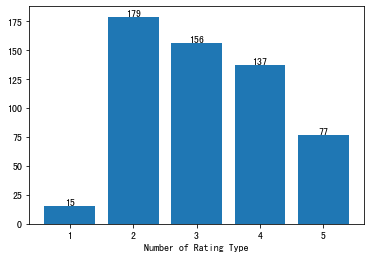

In [67]:
# Unique Answer in finalUser
ratingUnique = finalUser.groupby(['userId'])['rating'].nunique()

# Plot unqiue number
unqiueList = []
for i in range(1, 6):
    unqiueList.append(np.sum(ratingUnique == i))

plt.bar(range(1,6), unqiueList)
for x,y in zip(range(1,6), unqiueList):
    plt.text(x, y, y, ha='center',va='bottom')
plt.xlabel('Number of Rating Type')

In [68]:
# Map the reviewType and rating
ratingMap = {
    'Not Helpful At All': 1,
    'Not Very Helpful': 2,
    'Not Sure': 3,
    'Somehow Helpful': 4,
    'Very Helpful': 5
}
authMap = {
    'r1': -1,
    'r2': -1,
    'r3': 0,
    'r4': 0,
    'r5': 1,
    'r6': 1
}

verifyMap = {
    'r1': 1,
    'r2': 0,
    'r3': 1,
    'r4': 0,
    'r5': 1,
    'r6': 0
}

finalUser['authenticity'] = finalUser.loc[:, 'reviewType'].apply(lambda x: authMap[x])
finalUser['verified'] = finalUser.loc[:, 'reviewType'].apply(lambda x: verifyMap[x])
finalUser['rating_score'] = finalUser.loc[:, 'rating'].apply(lambda x: ratingMap[x])
finalUser = finalUser.sort_values(by='userId', ascending= True)

/Users/pureblack/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/pureblack/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/pureblack/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [69]:
# Sort user who submit multiple answers for same product 
Qual = finalUser.groupby('userId')['productId'].nunique() == 10
QualList = Qual[Qual].index.to_list()
finalUser = finalUser[finalUser.userId.isin(QualList)]

# Filter user who submit multiple answers
finalUser = finalUser.groupby(['userId', 'productId'], as_index=False).apply(lambda df: df.drop_duplicates("reviewType"))
finalUser

id  userId productId reviewType              rating  age  \
0    191      156       1        p1         r6     Somehow Helpful   40   
     190      155       1        p1         r5     Somehow Helpful   40   
     189      154       1        p1         r4  Not Helpful At All   40   
     188      153       1        p1         r3     Somehow Helpful   40   
     187      152       1        p1         r2     Somehow Helpful   40   
...           ...     ...       ...        ...                 ...  ...   
5579 38886  38887     870        p9         r1     Somehow Helpful   30   
     38887  38888     870        p9         r2            Not Sure   30   
     38888  38889     870        p9         r3     Somehow Helpful   30   
     38890  38891     870        p9         r5            Not Sure   30   
     38891  38892     870        p9         r6     Somehow Helpful   30   

            gender      use_amazon      read_review              created  \
0    191      male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     190      male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     189      male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     188      male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     187      male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
...            ...             ...              ...                  ...   
5579 38886  female  use_amazon-yes  read_review-yes  2021-04-26 01:10:14   
     38887  female  use_amazon-yes  read_review-yes  2021-04-26 01:10:14   
     38888  female  use_amazon-yes  read_review-yes  2021-04-26 01:10:14   
     38890  female  use_amazon-yes  read_review-yes  2021-04-26 01:10:14   
     38891  female  use_amazon-yes  read_review-yes  2021-04-26 01:10:14   

            authenticity  verified  rating_score  
0    191               1         0             4  
     190               1         1             4  
     189               0         0             1  
     188               0         1             4  
     187              -1         0             4  
...                  ...       ...           ...  
5579 38886            -1         1             4  
     38887            -1         0             3  
     38888             0         1             4  
     38890             1         1             3  
     38891             1         0             4  

[33480 rows x 13 columns]

In [70]:
# Setting the percentage for the rule 
PERCENT_PRODUCT = 0.5

# Filter user who not read question but give answers product >=3 
uniAnwser = finalUser.groupby(['userId', 'productId'], as_index=False)['rating'].nunique()
uniAnwser = uniAnwser[uniAnwser.rating >= 3]
groupUniAns = uniAnwser.groupby(['userId']).count()
qualGroupList1 = groupUniAns[(groupUniAns.productId / 10) >= PERCENT_PRODUCT].index.to_list()
print(len(qualGroupList1))

# For final user who's rating >=4
qualGroupList2 = finalUser.groupby(['userId'])['rating'].nunique()
qualGroupList2 = qualGroupList2[qualGroupList2 >= 4].index.to_list()
print(qualGroupList2)

# Top 8 remain
PERCENT_PRODUCT = 0.4
uniAnwser = finalUser.groupby(['userId', 'productId'], as_index=False)['rating'].nunique()
uniAnwser = uniAnwser[uniAnwser.rating >= 3]
groupUniAns = uniAnwser.groupby(['userId']).count()
qualGroupList3 = groupUniAns[(groupUniAns.productId / 10) == PERCENT_PRODUCT].index.to_list()[:8]

# Get new data 
finalUser = finalUser[finalUser.userId.isin(qualGroupList1) & finalUser.userId.isin(qualGroupList2) |                     finalUser.userId.isin(qualGroupList3)]

202
[1, 2, 4, 8, 10, 11, 12, 18, 33, 35, 38, 47, 64, 68, 69, 73, 74, 76, 78, 80, 84, 85, 86, 94, 98, 99, 102, 110, 115, 117, 119, 120, 124, 134, 140, 142, 148, 159, 163, 168, 176, 177, 184, 192, 203, 211, 242, 245, 248, 257, 265, 271, 273, 274, 276, 277, 285, 288, 290, 298, 301, 304, 306, 318, 319, 332, 344, 357, 359, 365, 369, 370, 375, 377, 382, 385, 387, 390, 392, 397, 398, 409, 413, 417, 421, 422, 423, 430, 432, 436, 438, 440, 445, 448, 449, 451, 454, 460, 472, 498, 503, 505, 506, 512, 516, 520, 524, 529, 535, 543, 545, 546, 547, 555, 556, 560, 562, 567, 569, 570, 576, 581, 582, 585, 589, 595, 596, 604, 609, 610, 618, 620, 621, 624, 628, 633, 640, 643, 646, 651, 653, 655, 656, 661, 665, 672, 674, 675, 680, 687, 692, 693, 694, 696, 697, 700, 705, 706, 707, 710, 712, 713, 716, 720, 721, 727, 730, 733, 738, 740, 741, 751, 761, 762, 764, 770, 772, 774, 775, 777, 778, 783, 786, 787, 791, 793, 795, 803, 809, 812, 821, 822, 824, 827, 828, 830, 831, 834, 835, 837, 838, 843, 845, 848, 850, 

In [71]:
finalUser

id  userId productId reviewType              rating  age  \
0    191      156       1        p1         r6     Somehow Helpful   40   
     190      155       1        p1         r5     Somehow Helpful   40   
     189      154       1        p1         r4  Not Helpful At All   40   
     188      153       1        p1         r3     Somehow Helpful   40   
     187      152       1        p1         r2     Somehow Helpful   40   
...           ...     ...       ...        ...                 ...  ...   
5549 38654  38655     862        p9         r3     Somehow Helpful   37   
     38653  38654     862        p9         r2            Not Sure   37   
     38652  38653     862        p9         r1    Not Very Helpful   37   
     38651  38652     862        p9         r6     Somehow Helpful   37   
     38650  38651     862        p9         r5            Not Sure   37   

           gender      use_amazon      read_review              created  \
0    191     male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     190     male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     189     male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     188     male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     187     male  use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
...           ...             ...              ...                  ...   
5549 38654   male  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38653   male  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38652   male  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38651   male  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38650   male  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   

            authenticity  verified  rating_score  
0    191               1         0             4  
     190               1         1             4  
     189               0         0             1  
     188               0         1             4  
     187              -1         0             4  
...                  ...       ...           ...  
5549 38654             0         1             4  
     38653            -1         0             3  
     38652            -1         1             2  
     38651             1         0             4  
     38650             1         1             3  

[9720 rows x 13 columns]

In [72]:
finalUser.userId.nunique()

162

In [73]:
finalUser = finalUser.drop('id', axis=1)
finalUser.to_csv('./output_170.csv', index=False)

In [74]:
finalUser

userId productId reviewType              rating  age gender  \
0    191         1        p1         r6     Somehow Helpful   40   male   
     190         1        p1         r5     Somehow Helpful   40   male   
     189         1        p1         r4  Not Helpful At All   40   male   
     188         1        p1         r3     Somehow Helpful   40   male   
     187         1        p1         r2     Somehow Helpful   40   male   
...            ...       ...        ...                 ...  ...    ...   
5549 38654     862        p9         r3     Somehow Helpful   37   male   
     38653     862        p9         r2            Not Sure   37   male   
     38652     862        p9         r1    Not Very Helpful   37   male   
     38651     862        p9         r6     Somehow Helpful   37   male   
     38650     862        p9         r5            Not Sure   37   male   

                use_amazon      read_review              created  \
0    191    use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     190    use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     189    use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     188    use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
     187    use_amazon-yes  read_review-yes  2021-04-13 15:50:52   
...                    ...              ...                  ...   
5549 38654  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38653  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38652  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38651  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   
     38650  use_amazon-yes  read_review-yes  2021-04-25 23:46:51   

            authenticity  verified  rating_score  
0    191               1         0             4  
     190               1         1             4  
     189               0         0             1  
     188               0         1             4  
     187              -1         0             4  
...                  ...       ...           ...  
5549 38654             0         1             4  
     38653            -1         0             3  
     38652            -1         1             2  
     38651             1         0             4  
     38650             1         1             3  

[9720 rows x 12 columns]

Text(0.5, 0, 'Number of Rating Type')

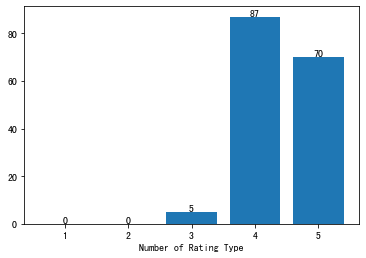

In [75]:
# Unique Answer in finalUser
ratingUnique = finalUser.groupby(['userId'])['rating'].nunique()

# Plot unqiue number
unqiueList = []
for i in range(1, 6):
    unqiueList.append(np.sum(ratingUnique == i))

plt.bar(range(1,6), unqiueList)
for x,y in zip(range(1,6), unqiueList):
    plt.text(x, y, y, ha='center',va='bottom')
plt.xlabel('Number of Rating Type')